# Unsupervised Learning Project

#### (Naveen Pete, PGP-AIML Online August 20-A)

## Data Description

The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

## Domain
Object recognition

## Context
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

## Attribute Information
- All the features are geometric features extracted from the silhouette.
- All are numeric in nature.

## Learning Outcomes
- Exploratory Data Analysis
- Reduce number dimensions in the dataset with minimal information loss
- Train a model using Principal Components

## Objective
Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.

### Import the necessary libraries

In [1]:
# Libraries needed for scientific computation, data analysis and manipulation
import numpy as np
import pandas as pd

# Libraries needed for statistical data visualization
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

## 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks)

### Load the dataset

In [2]:
# Initialize dataframe with Vehicle dataset
main_df = pd.read_csv("vehicle.csv")

### Get a feel of the data

In [3]:
main_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

### Count number of rows (records) & columns (attributes or features) in the dataset

In [4]:
row_count, column_count = main_df.shape

print(f'No. of rows: {row_count}')
print(f'No. of columns: {column_count}')

No. of rows: 846
No. of columns: 19


### Understand the structure of the dataset and the type of attributes within it 

In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

**Observations**
- There are 846 rows and 19 columns in the dataset
- All the columns except 'class' are numerical
- 'class' column contains the class of vehicles. It is the target variable

### Check the presence of null and zero(0) values

In [6]:
main_df.isnull().apply(pd.value_counts)

compactness  circularity  distance_circularity  radius_ratio  \
False        846.0          841                   842           840   
True           NaN            5                     4             6   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
False                   844                    846.0            845   
True                      2                      NaN              1   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
False            845                     843                      846.0   
True               1                       3                        NaN   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
False              843                844                        844   
True                 3                  2                          2   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
False                          842             840               845   
True                             4               6                 1   

       skewness_about.2  hollows_ratio  class  
False               845          846.0  846.0  
True                  1            NaN    NaN

In [7]:
# function to print and return column names that contain null values
def get_columns_with_null_values(df):
    print('Columns with null values:')
    print('-------------------------')

    columns_with_null_values = []
    ctr = 0
    for col in df.columns:
        null_count = df[col].isnull().sum()
        if null_count > 0:
            columns_with_null_values.append(col)
            ctr = ctr + 1
            print(f'{ctr}. {col} - {null_count}')
            
    return columns_with_null_values

# function to print and return column names that contain zero(0) values
def get_columns_with_zero_values(df):
    print('Columns with zero values:')
    print('-------------------------')
    
    columns_with_zero_values = []
    ctr = 0
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type != 'object':
            zero_count = df[main_df[col]==0][col].count()
            if zero_count > 0:
                columns_with_zero_values.append(col)
                ctr = ctr + 1
                print(f'{ctr}. {col} - {zero_count}')
                
    return columns_with_zero_values

# function to impute null values with median value
def impute_null_values(df, columns):
    copied_df = df.copy()
    for col in columns:
        value = copied_df[col].median()
        copied_df[col] = copied_df[col].fillna(value)
    return copied_df

In [8]:
columns_with_null_values = get_columns_with_null_values(main_df)
columns_with_null_values

Columns with null values:
-------------------------
1. circularity - 5
2. distance_circularity - 4
3. radius_ratio - 6
4. pr.axis_aspect_ratio - 2
5. scatter_ratio - 1
6. elongatedness - 1
7. pr.axis_rectangularity - 3
8. scaled_variance - 3
9. scaled_variance.1 - 2
10. scaled_radius_of_gyration - 2
11. scaled_radius_of_gyration.1 - 4
12. skewness_about - 6
13. skewness_about.1 - 1
14. skewness_about.2 - 1


['circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2']

In [9]:
columns_with_zero_values = get_columns_with_zero_values(main_df)
columns_with_zero_values

Columns with zero values:
-------------------------
1. skewness_about - 77
2. skewness_about.1 - 30


['skewness_about', 'skewness_about.1']

### Impute null values in the dataset

In [10]:
data_df = impute_null_values(main_df, columns_with_null_values)

#### Before imputing null values

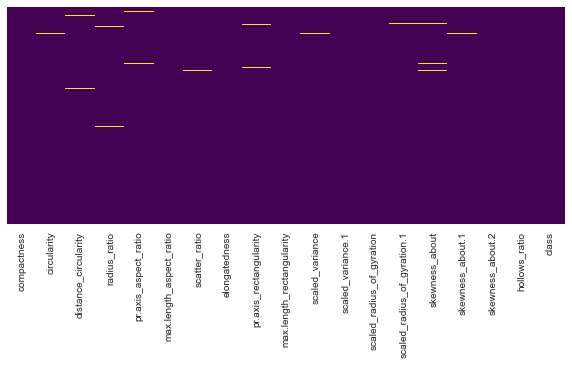

In [11]:
plt.figure(figsize=(10, 4))
sns.heatmap(main_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### After imputing null values

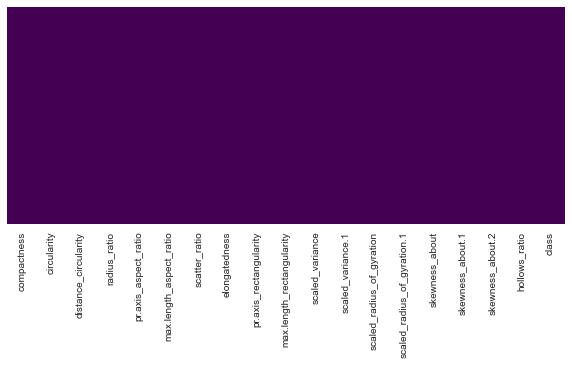

In [12]:
plt.figure(figsize=(10, 4))
sns.heatmap(data_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Observations**
- 14 columns had null values. They have been imputed with median values
- 2 columns have zero values. Right now, not handling these columns

## 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points)

In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

In [14]:
data_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

### Separate independent and dependent variables

In [15]:
data_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [16]:
# separate independent and dependent variables
independent_features = [
    'compactness', 'circularity', 'distance_circularity', 
    'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 
    'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 
    'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 
    'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 
    'skewness_about.1', 'skewness_about.2', 'hollows_ratio'
]

independent_feature_set_1 = [
    'compactness', 'circularity', 'distance_circularity', 
    'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 
    'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 
]

independent_feature_set_2 = [
    'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 
    'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 
    'skewness_about.1', 'skewness_about.2', 'hollows_ratio'
]

dependent_feature = 'class'

### Common functions required for plotting distribution, boxplot, correlation and identifying correlated columns

In [17]:
# function to plot the distribution of numeric columns 
def plot_distribution(df, columns):
    for col in columns:
        sns.displot(data=df, kind='hist', x=col, bins=20, kde=True)

# function to plot the boxplot distribution of numeric columns 
def plot_boxplot(df, x_column, y_columns):
    plt.figure(figsize=(25, 25))
    
    index = 0
    for col in y_columns:
        index = index + 1
        plt.subplot(3, 3, index)
        sns.boxplot(x=x_column, y=col, data=df)
        
# function to plot correlation using a heatmap
def plot_correlation(df):
    corr = df.corr()
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr, annot=True, fmt='.2f')

# function to plot distribution and box plots for a given set of columns
def plot_dist_and_box(df, columns):
    for col in columns:
        fig, (g1, g2) = plt.subplots(nrows=1, ncols=2)
        fig.set_size_inches(15, 3)
        sns.histplot(x=df[col], ax=g1, kde=True, bins=20)
        g1.set_title(f'Distribution: {col}')

        sns.boxplot(x=df[col], ax=g2)
        g2.set_title(f'Box Plot: {col}')
        
# function to return highly correlated columns
def get_corr_features(df, threshold):
    corr_columns = set()
    corr_matrix = df.corr()

    ctr = 0
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            corr_value = corr_matrix.iloc[i, j]
            if corr_value >= threshold:
                col_name_i = corr_matrix.columns[i]
                col_name_j = corr_matrix.columns[j]
                corr_columns.add(col_name_i)
                ctr += 1
                print(f'{ctr}. \'{col_name_i}\' and \'{col_name_j}\' are highly correlated (Correlation value = {corr_value})')
                
    return corr_columns

# function to identify and treat outlier columns
def treat_outliers(df, columns):
    copied_df = df.copy()
    for col in columns:
        q1 = copied_df[col].quantile(0.25)
        q3 = copied_df[col].quantile(0.75)
        iqr = q3 - q1

        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr

        value = copied_df[col].median()
        copied_df.loc[ (copied_df[col] < low) | (copied_df[col] > high), col] = value
        
    return copied_df

### Plot distribution and outliers within independent columns

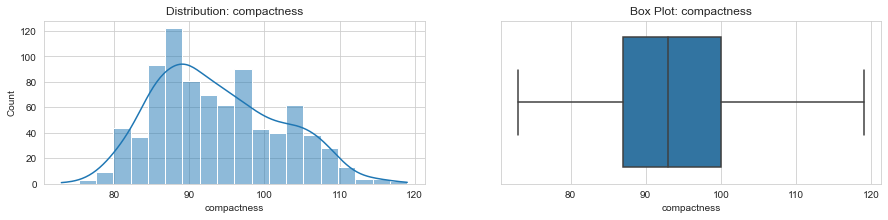

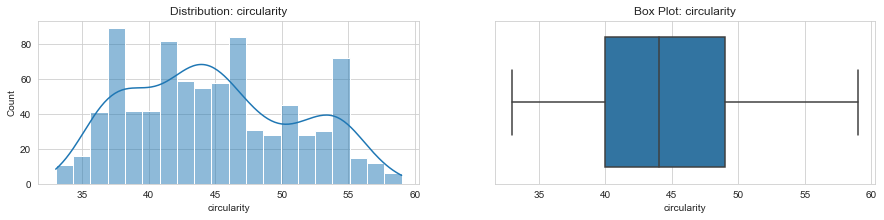

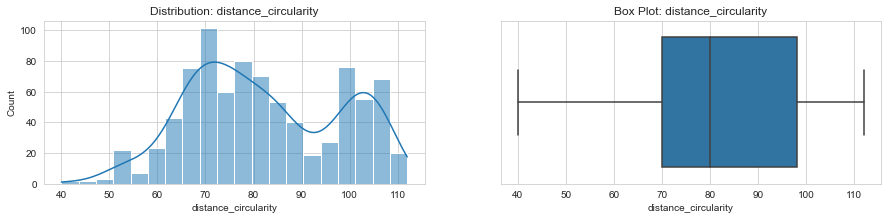

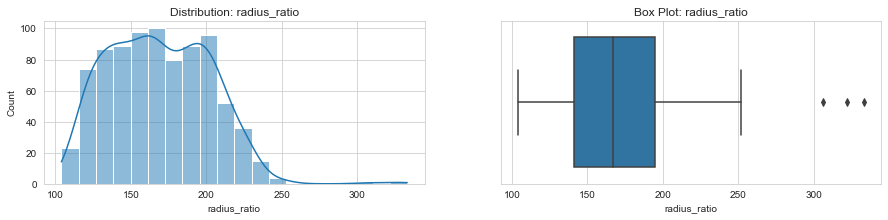

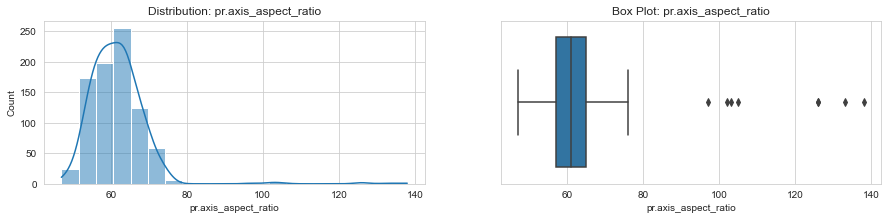

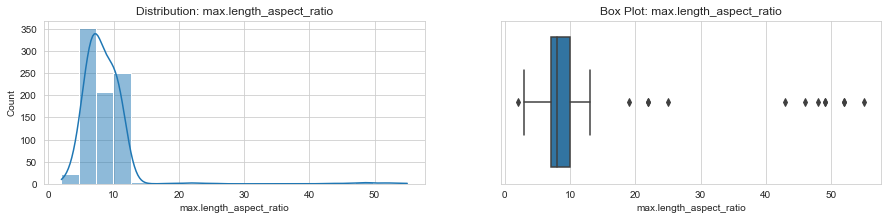

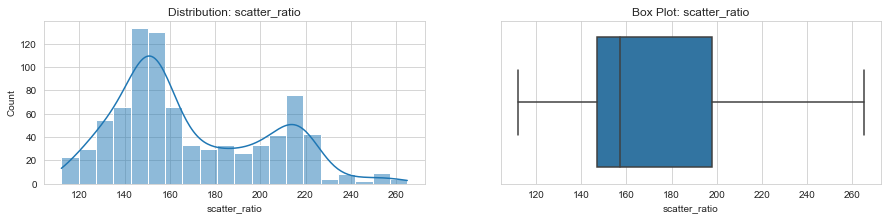

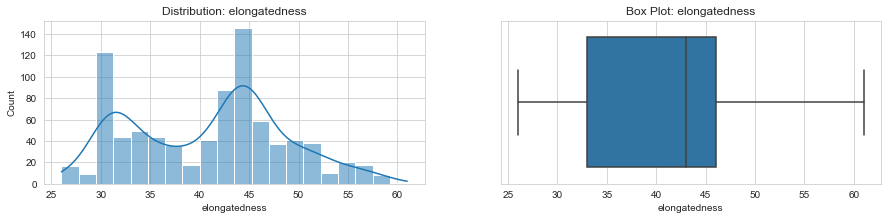

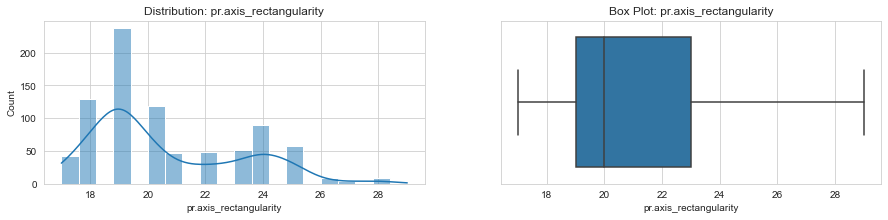

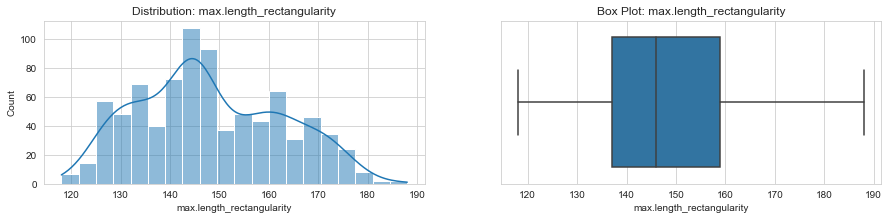

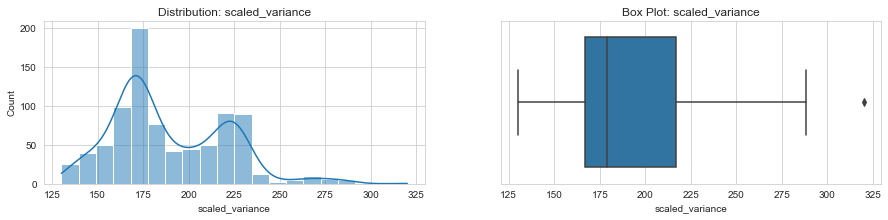

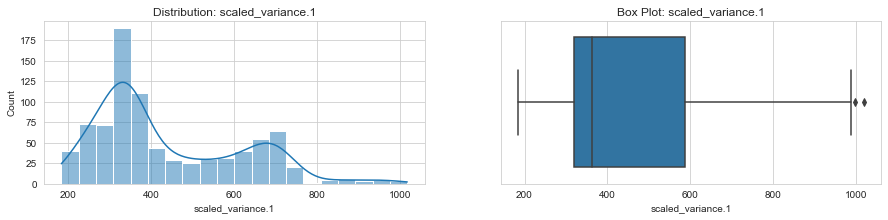

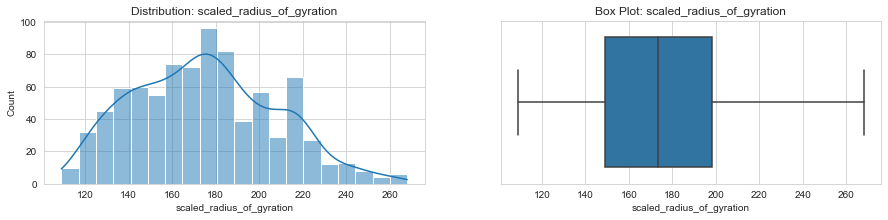

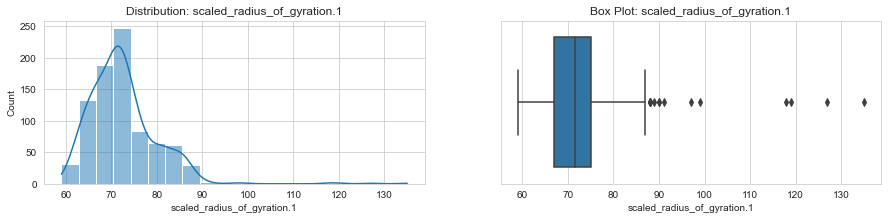

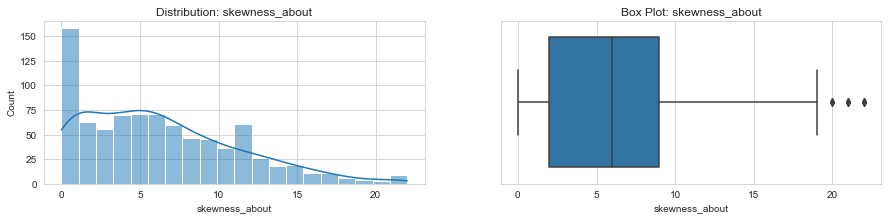

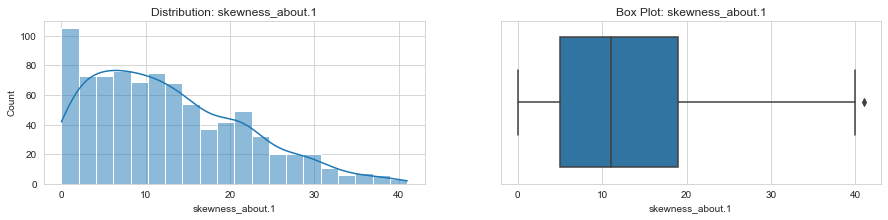

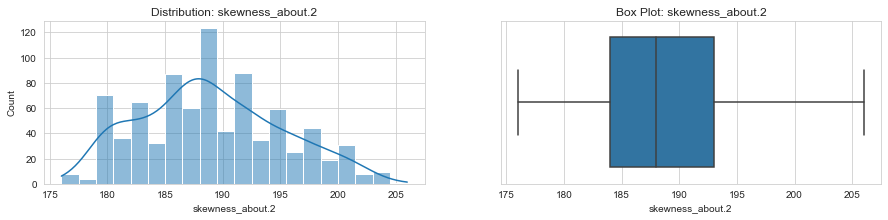

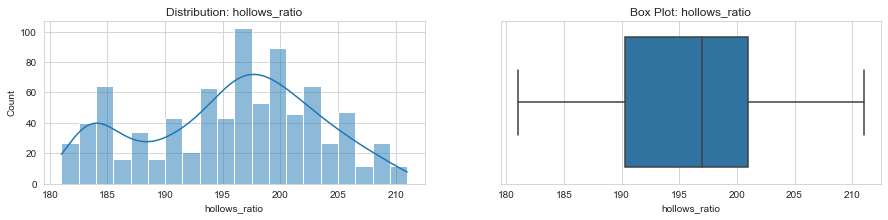

In [18]:
plot_dist_and_box(data_df, independent_features)

**Observations**
- Summary of observations given below:
    1. compactness - Approx normal distribution, no outliers
    1. circularity - Slightly right skewed
    1. distance_circularity - Left skewed
    1. radius_ratio - Approx normal distribution, with outliers
    1. pr.axis_aspect_ratio - Approx normal distribution, with outliers
    1. max.length_aspect_ratio - 2 peaks, with outliers
    1. scatter_ratio - 2 peaks, right skewed
    1. elongatedness - 2 peaks, left skewed
    1. pr.axis_rectangularity - 2 peaks, right skewed
    1. max.length_rectangularity - 3 peaks
    1. scaled_variance - 2 peaks, with outliers
    1. scaled_variance.1 - 2 peaks, with outliers
    1. scaled_radius_of_gyration - Slightly right skewed
    1. scaled_radius_of_gyration.1 - Has multiple outliers
    1. skewness_about - Right skewed, with outliers
    1. skewness_about.1 - Has outliers
    1. skewness_about.2 - No outliers
    1. hollows_ratio - 2 peaks, no outliers
- Following columns have outliers:
    1. radius_ratio
    1. pr.axis_aspect_ratio
    1. max.length_aspect_ratio
    1. scaled_variance
    1. scaled_variance.1
    1. scaled_radius_of_gyration.1
    1. skewness_about
    1. skewness_about.1

In [19]:
# plot_boxplot(data_df, dependent_feature, independent_feature_set_1)

In [20]:
# plot_boxplot(data_df, dependent_feature, independent_feature_set_2)

### Verify the distribution after treating outliers

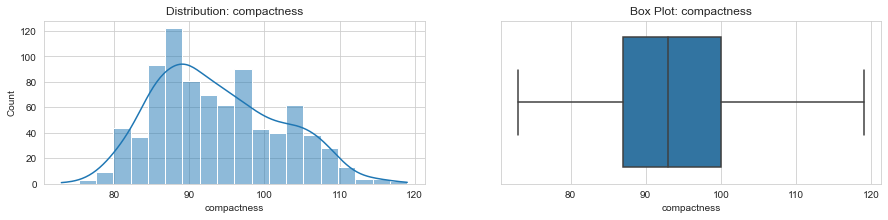

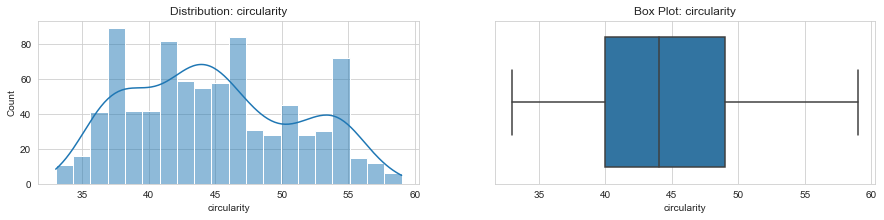

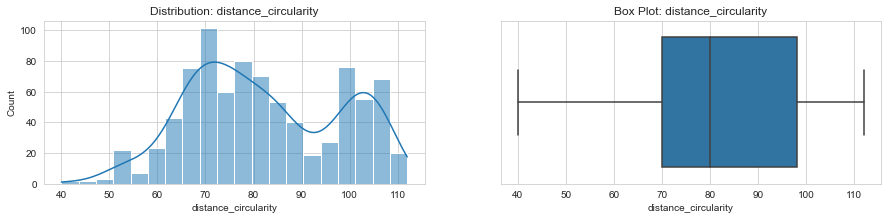

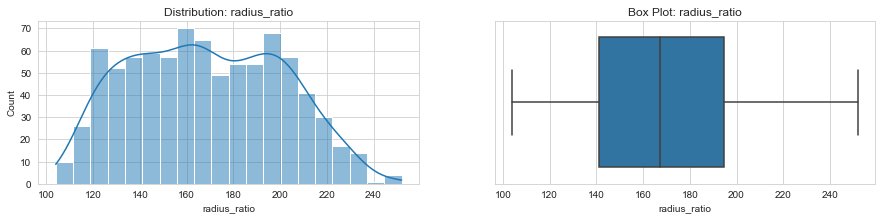

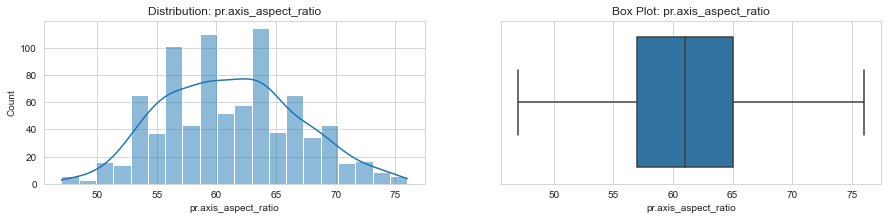

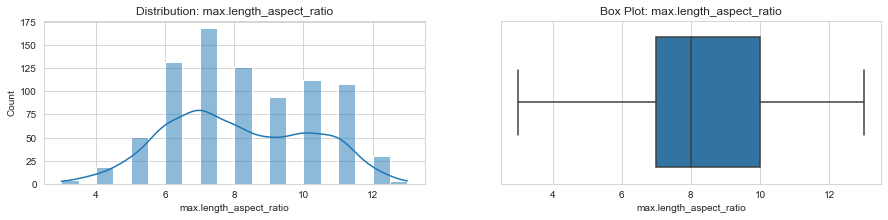

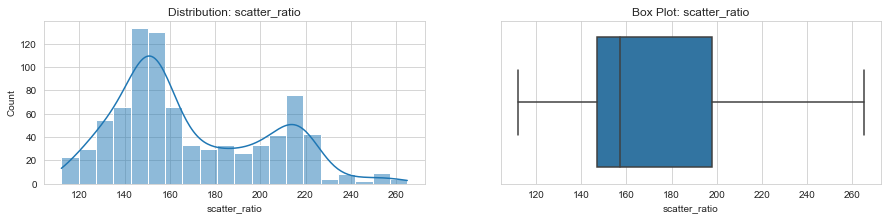

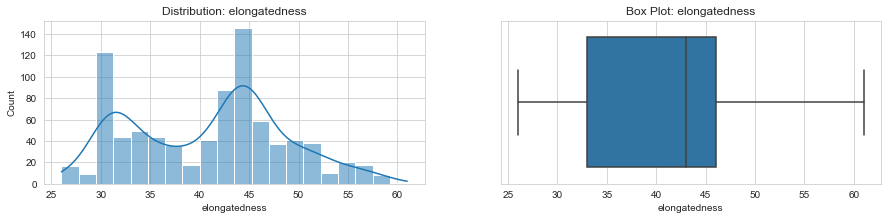

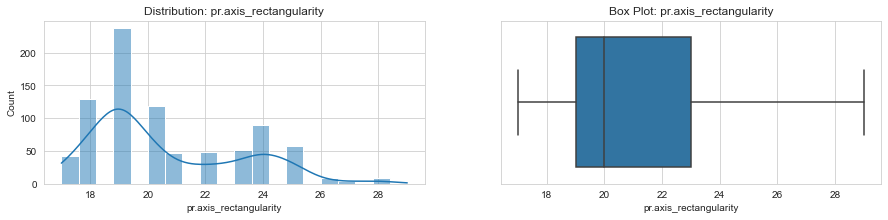

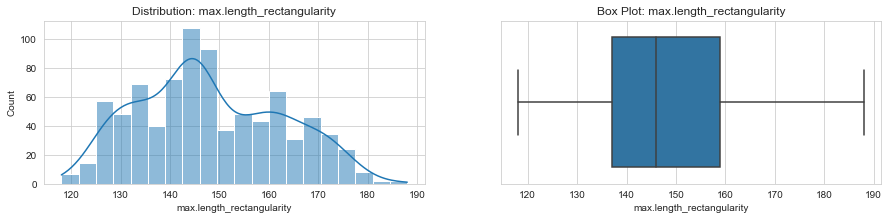

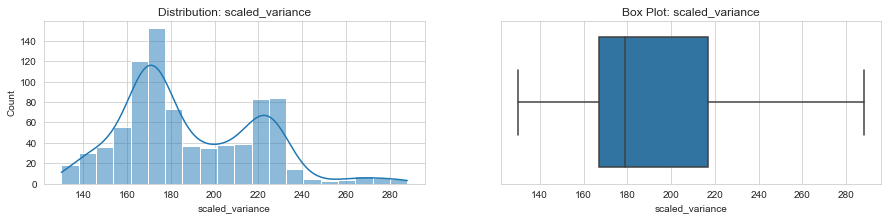

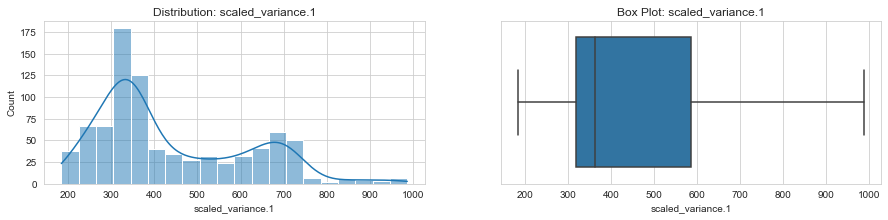

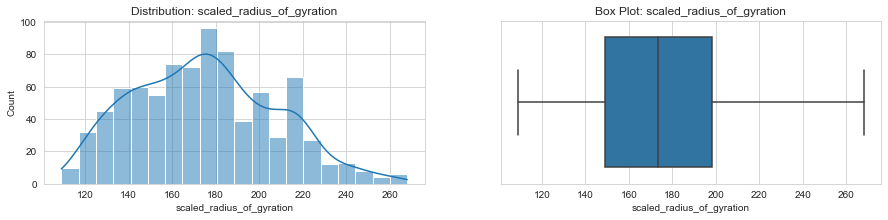

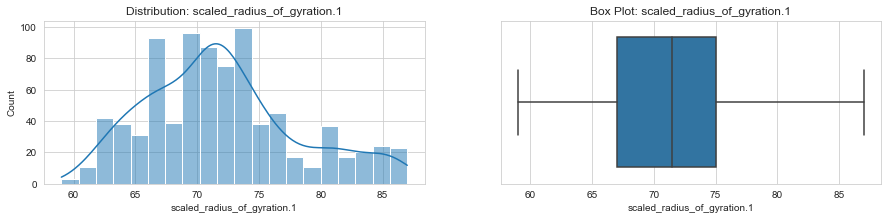

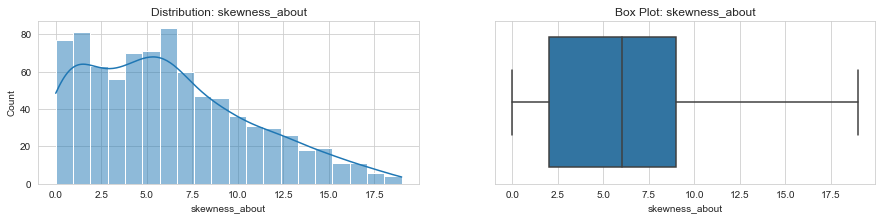

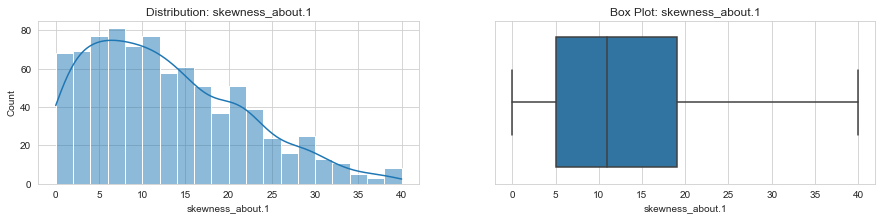

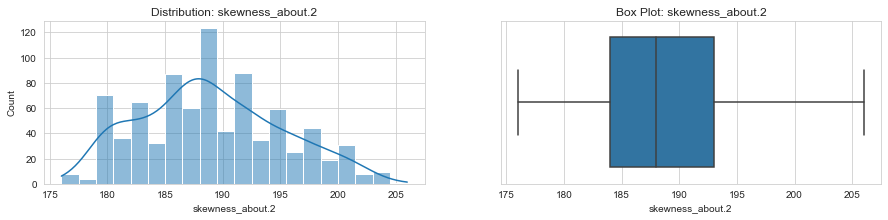

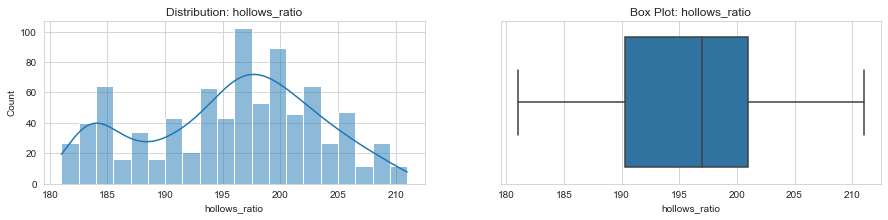

In [21]:
columns_with_outliers = [
    'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 
    'scaled_variance.1', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1'
]
treated_data_df = treat_outliers(data_df, columns_with_outliers)
plot_dist_and_box(treated_data_df, independent_features)

### Target column distribution and observations

In [22]:
treated_data_df[dependent_feature].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

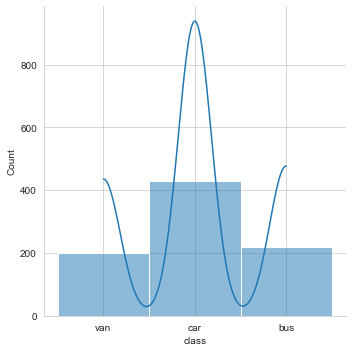

In [23]:
plot_distribution(treated_data_df, [dependent_feature])

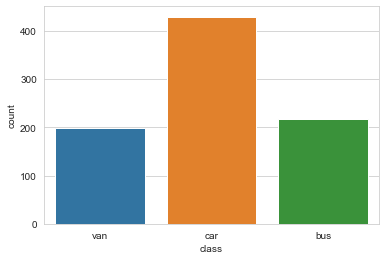

In [24]:
sns.countplot(data=treated_data_df, x=dependent_feature)

**Observations**
- 51% of the total rows contain cars
- 26% of the total rows contain buses
- 23% of the total rows contain vans

In [25]:
X = treated_data_df[independent_features]
y = treated_data_df[dependent_feature]

In [26]:
X.shape

(846, 18)

In [27]:
y.shape

(846,)

In [28]:
X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                  61.0                      8.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                         71.5             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [29]:
y.head()

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

### Study the correlation between independent columns

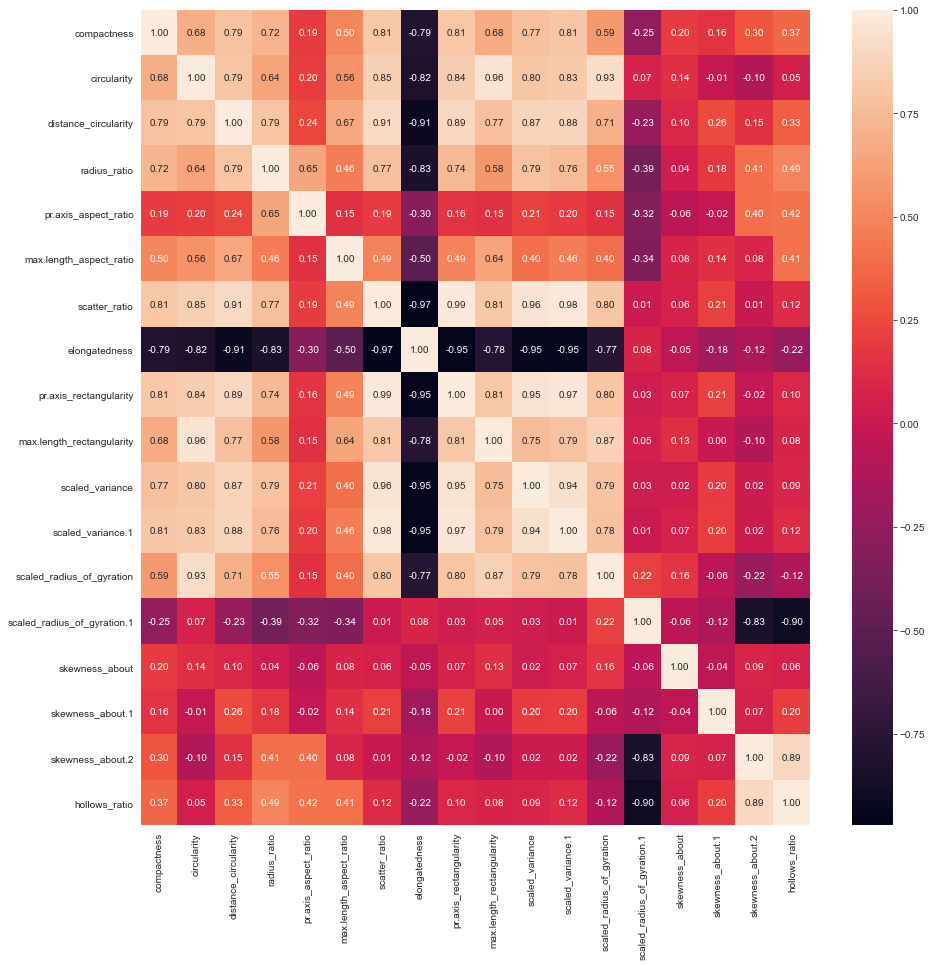

In [30]:
plot_correlation(X)

In [31]:
# get all columns that are correlated greater than 90%
highly_corr_features = get_corr_features(X, 0.90)
highly_corr_features

1. 'scatter_ratio' and 'distance_circularity' are highly correlated (Correlation value = 0.9050757734130161)
2. 'pr.axis_rectangularity' and 'scatter_ratio' are highly correlated (Correlation value = 0.9897505102299368)
3. 'max.length_rectangularity' and 'circularity' are highly correlated (Correlation value = 0.9613180653243628)
4. 'scaled_variance' and 'scatter_ratio' are highly correlated (Correlation value = 0.9608828170382082)
5. 'scaled_variance' and 'pr.axis_rectangularity' are highly correlated (Correlation value = 0.9473291706308378)
6. 'scaled_variance.1' and 'scatter_ratio' are highly correlated (Correlation value = 0.9804465145548897)
7. 'scaled_variance.1' and 'pr.axis_rectangularity' are highly correlated (Correlation value = 0.9736060373908709)
8. 'scaled_variance.1' and 'scaled_variance' are highly correlated (Correlation value = 0.9437798679119225)
9. 'scaled_radius_of_gyration' and 'circularity' are highly correlated (Correlation value = 0.9258160243502346)


{'max.length_rectangularity',
 'pr.axis_rectangularity',
 'scaled_radius_of_gyration',
 'scaled_variance',
 'scaled_variance.1',
 'scatter_ratio'}

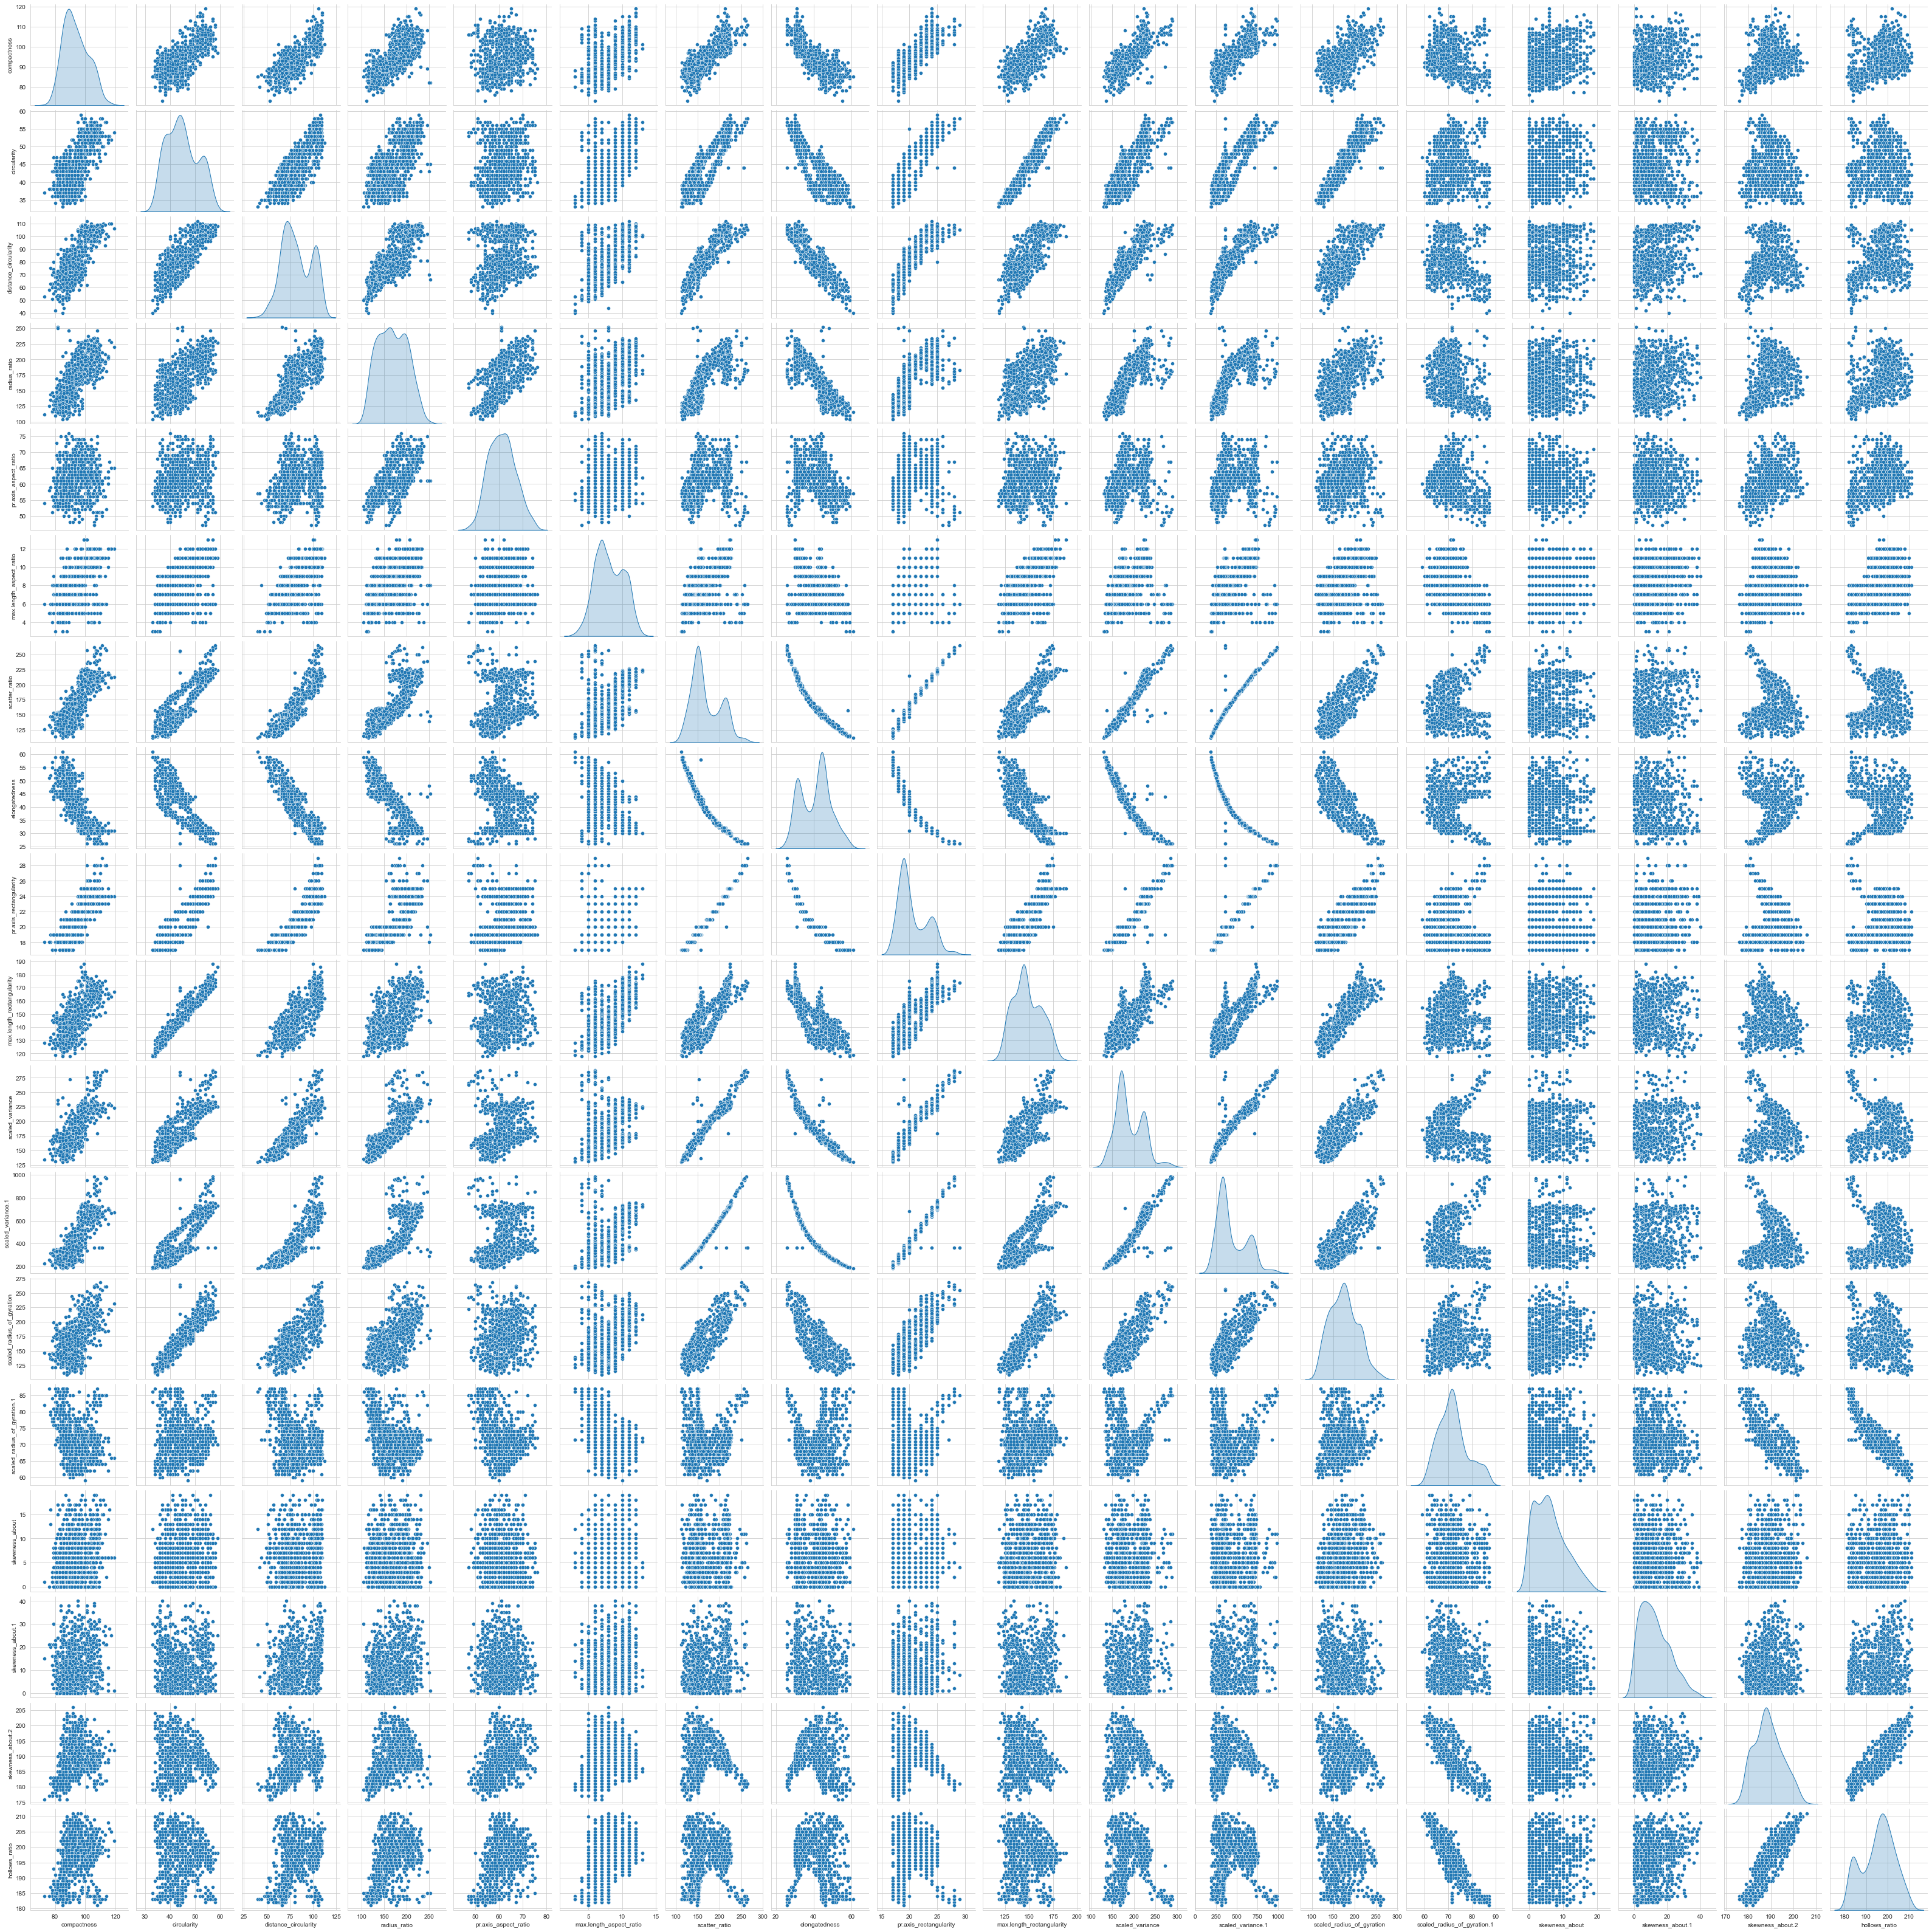

In [32]:
sns.pairplot(X, diag_kind='kde')

**Observations**
- From the above correlation heatmap and pairplot grid, we can observe that there are many columns that have very high collinearity. Hence we can consider using Principal Component Analysis (PCA) for reducing redundant columns 

## 3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks)

### Scale the dataset

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# function to scale the dataset
def get_scaled_df(df):
    scaler = StandardScaler()

    scaler_result = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaler_result, columns=list(df.columns))
    
    return scaled_df

In [34]:
scaled_X = get_scaled_df(X)
scaled_X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.300945   
1    -0.325470    -0.623732              0.120741     -0.850666   
2     1.254193     0.844303              1.519141      1.265808   
3    -0.082445    -0.623732             -0.006386     -0.290423   
4    -1.054545    -0.134387             -0.769150      1.141310   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.933135                 0.912212      -0.207598   
1             -0.740596                 0.427456      -0.599423   
2              0.863642                 0.912212       1.148719   
3              0.328896                 0.427456      -0.750125   
4             -0.027601                -0.057300      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.400771          -0.337407                   0.285705   
1        -0.594220          -0.618623                  -0.513630   
2         1.114582           1.131806                   1.392477   
3        -0.916635          -0.739145                  -1.466683   
4         1.694930          -0.647319                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.315806       -0.032330          0.387162   
1                     0.009122        0.624090          0.161740   
2                     0.171586        1.718123         -0.401818   
3                    -1.453054       -0.032330         -0.289106   
4                    -0.072110        0.624090         -0.176395   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

### Split data into train and test

In [35]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=10)

In [36]:
X_train.shape

(592, 18)

In [37]:
y_train.shape

(592,)

In [38]:
X_test.shape

(254, 18)

In [39]:
y_test.shape

(254,)

## 4. Train a Support Vector Machine (SVM) using the train set and get the accuracy on the test set (10 marks)

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def init_svc_classifier():
    return SVC(gamma='auto')

def train_and_predict(model_name, model, X_train, y_train, X_test, y_test):
    print(f'MODEL: {model_name}\n')
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    score_train = round(model.score(X_train, y_train), 4) * 100
    print(f'Train Accuracy Score: {score_train}')

    score_test = round(model.score(X_test, y_test), 4) * 100
    print(f'Test Accuracy Score: {score_test}')
    
    model_dict = {
        'y_pred': y_pred, 
        'model_score_train': score_train, 
        'model_score_test': score_test
    }
    
    return model_dict

def get_metrics(model_name, y_test, y_pred):
    print('---------------------')
    print('Classification Report')
    print('---------------------')
    cr = classification_report(y_test, y_pred)
    print(cr)
    
    print('----------------')
    print('Confusion Matrix')
    print('----------------')
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='YlOrRd')

    accuracy = round(accuracy_score(y_test, y_pred), 4) * 100
    f1 = round(f1_score(y_test, y_pred, average='micro'), 4) * 100
    precision = round(precision_score(y_test, y_pred, average='micro'), 4) * 100
    recall = round(recall_score(y_test, y_pred, average='micro'), 4) * 100

    score_dict = {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }
    
    return score_dict   

### Train SVM and print metrics

MODEL: SVM

Train Accuracy Score: 96.78999999999999
Test Accuracy Score: 96.06
---------------------
Classification Report
---------------------
              precision    recall  f1-score   support

         bus       0.99      0.99      0.99        71
         car       0.98      0.96      0.97       125
         van       0.90      0.93      0.92        58

    accuracy                           0.96       254
   macro avg       0.95      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254

----------------
Confusion Matrix
----------------
[[ 70   0   1]
 [  0 120   5]
 [  1   3  54]]


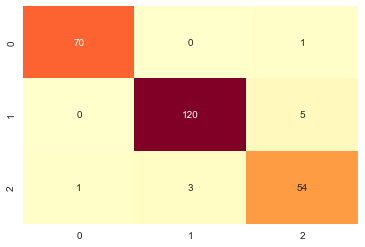

In [41]:
model = init_svc_classifier()
model_dict_svm = train_and_predict('SVM', model, X_train, y_train, X_test, y_test)
score_dict_svm = get_metrics('SVM', y_test, model_dict_svm['y_pred'])

In [42]:
model_dict_svm

{'y_pred': array(['car', 'car', 'car', 'car', 'bus', 'car', 'car', 'car', 'car',
        'bus', 'car', 'van', 'car', 'car', 'van', 'car', 'bus', 'bus',
        'car', 'van', 'van', 'car', 'van', 'bus', 'bus', 'car', 'van',
        'bus', 'bus', 'car', 'car', 'van', 'bus', 'car', 'van', 'car',
        'van', 'car', 'bus', 'van', 'bus', 'car', 'car', 'bus', 'car',
        'car', 'car', 'car', 'bus', 'car', 'car', 'bus', 'car', 'van',
        'car', 'van', 'car', 'van', 'car', 'bus', 'bus', 'van', 'car',
        'bus', 'bus', 'car', 'van', 'car', 'car', 'bus', 'bus', 'car',
        'bus', 'car', 'bus', 'bus', 'bus', 'bus', 'car', 'car', 'van',
        'van', 'bus', 'car', 'car', 'car', 'van', 'car', 'van', 'bus',
        'bus', 'van', 'van', 'car', 'van', 'car', 'van', 'van', 'car',
        'car', 'car', 'car', 'car', 'van', 'van', 'car', 'van', 'bus',
        'bus', 'van', 'car', 'van', 'bus', 'car', 'car', 'van', 'car',
        'bus', 'van', 'car', 'bus', 'car', 'bus', 'car', 'bus', 'ca

In [43]:
score_dict_svm

{'accuracy': 96.06, 'f1': 96.06, 'precision': 96.06, 'recall': 96.06}

## 5. Perform K-fold cross validation and get the cross validation score of the model (optional)

In [44]:
from sklearn.model_selection import KFold, cross_val_score

def cross_validate(model, X, y):
    num_folds = 10
    seed = 10

    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

    scores = cross_val_score(model, X, y, cv=kfold)
    
    cv_score_dict = {
        'mean': round(scores.mean(), 4) * 100,
        'std': round(scores.std(), 4) * 100,
        'min': round(scores.min(), 4) * 100,
        'max': round(scores.max(), 4) * 100
    }
    
    print('-------------------------------')
    print('Cross Validation Accuracy Score')
    print('-------------------------------')
    print(f"1. Mean: {cv_score_dict['mean']}")
    print(f"2. Std. Dev.: {cv_score_dict['std']}")
    print(f"3. Min: {cv_score_dict['min']}")
    print(f"4. Max: {cv_score_dict['max']}")
    
    return cv_score_dict

In [45]:
model = init_svc_classifier()
cv_score_svm = cross_validate(model, scaled_X, y)

-------------------------------
Cross Validation Accuracy Score
-------------------------------
1. Mean: 95.87
2. Std. Dev.: 1.92
3. Min: 92.94
4. Max: 98.81


In [46]:
cv_score_svm

{'mean': 95.87, 'std': 1.92, 'min': 92.94, 'max': 98.81}

## 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (10 points)

In [47]:
scaled_X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.300945   
1    -0.325470    -0.623732              0.120741     -0.850666   
2     1.254193     0.844303              1.519141      1.265808   
3    -0.082445    -0.623732             -0.006386     -0.290423   
4    -1.054545    -0.134387             -0.769150      1.141310   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.933135                 0.912212      -0.207598   
1             -0.740596                 0.427456      -0.599423   
2              0.863642                 0.912212       1.148719   
3              0.328896                 0.427456      -0.750125   
4             -0.027601                -0.057300      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.400771          -0.337407                   0.285705   
1        -0.594220          -0.618623                  -0.513630   
2         1.114582           1.131806                   1.392477   
3        -0.916635          -0.739145                  -1.466683   
4         1.694930          -0.647319                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.315806       -0.032330          0.387162   
1                     0.009122        0.624090          0.161740   
2                     0.171586        1.718123         -0.401818   
3                    -1.453054       -0.032330         -0.289106   
4                    -0.072110        0.624090         -0.176395   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [48]:
scaled_X.shape

(846, 18)

### Use PCA to identify principal components

In [49]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_X)

PCA()

In [50]:
# eigen values
pca.explained_variance_

array([9.74940269e+00, 3.35071912e+00, 1.19238155e+00, 1.13381916e+00,
       8.83997312e-01, 6.66265745e-01, 3.18150910e-01, 2.28179142e-01,
       1.31018595e-01, 7.98619108e-02, 7.33979478e-02, 6.46162669e-02,
       4.01448646e-02, 3.22758478e-02, 2.93936408e-02, 2.27005257e-02,
       1.98136761e-02, 5.16287320e-03])

In [51]:
# eigen vectors
pca.components_

array([[ 2.72502890e-01,  2.87254690e-01,  3.02421105e-01,
         2.69713545e-01,  9.78607336e-02,  1.95200137e-01,
         3.10523932e-01, -3.09006904e-01,  3.07287000e-01,
         2.78154157e-01,  2.99765086e-01,  3.05532374e-01,
         2.63237620e-01, -4.19359352e-02,  3.60832115e-02,
         5.87204797e-02,  3.80131449e-02,  8.47399995e-02],
       [-8.70435783e-02,  1.31621757e-01, -4.61430061e-02,
        -1.97931263e-01, -2.57839952e-01, -1.08045626e-01,
         7.52853487e-02, -1.32299375e-02,  8.75601978e-02,
         1.22154240e-01,  7.72657535e-02,  7.15030171e-02,
         2.10582046e-01,  5.03621577e-01, -1.57663214e-02,
        -9.27462386e-02, -5.01621218e-01, -5.07612106e-01],
       [-3.81852075e-02, -2.01146908e-01,  6.34621085e-02,
         5.62851689e-02, -6.19927464e-02, -1.48957820e-01,
         1.09042833e-01, -9.08526930e-02,  1.06070496e-01,
        -2.13684693e-01,  1.44599805e-01,  1.10343735e-01,
        -2.02870191e-01,  7.38640211e-02, -5.59173987e

In [52]:
# variance ratio
pca.explained_variance_ratio_

array([5.40993254e-01, 1.85931025e-01, 6.61651173e-02, 6.29154973e-02,
       4.90529110e-02, 3.69710110e-02, 1.76541580e-02, 1.26616348e-02,
       7.27020705e-03, 4.43152841e-03, 4.07284383e-03, 3.58554935e-03,
       2.22763400e-03, 1.79098315e-03, 1.63104981e-03, 1.25964961e-03,
       1.09945865e-03, 2.86487251e-04])

Text(0.5, 0, 'Eigen Value')

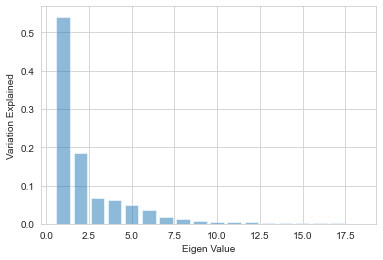

In [53]:
# plot eigen values
plt.bar(list(range(1,19)), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variation Explained')
plt.xlabel('Eigen Value')

In [54]:
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
cumulative_sum

array([0.54099325, 0.72692428, 0.7930894 , 0.85600489, 0.90505781,
       0.94202882, 0.95968297, 0.97234461, 0.97961482, 0.98404634,
       0.98811919, 0.99170474, 0.99393237, 0.99572335, 0.9973544 ,
       0.99861405, 0.99971351, 1.        ])

Text(0.5, 0, 'Eigen Value')

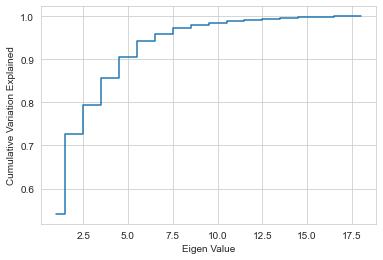

In [55]:
# plot using step function
plt.step(list(range(1,19)), cumulative_sum, where = 'mid')
plt.ylabel('Cumulative Variation Explained')
plt.xlabel('Eigen Value')

**Observations**
- From the above plot, we can observe that the first 7 or 8 components explain 95% variation in the data. Let us consider the first 8 components for building the model

### Construct the dataset using PCA components

In [56]:
pca = PCA(n_components=8)

pca_result = pca.fit_transform(scaled_X)
pca_X = pd.DataFrame(pca_result)
pca_X.shape

(846, 8)

In [57]:
y.shape

(846,)

### Study the correlation between PCA components

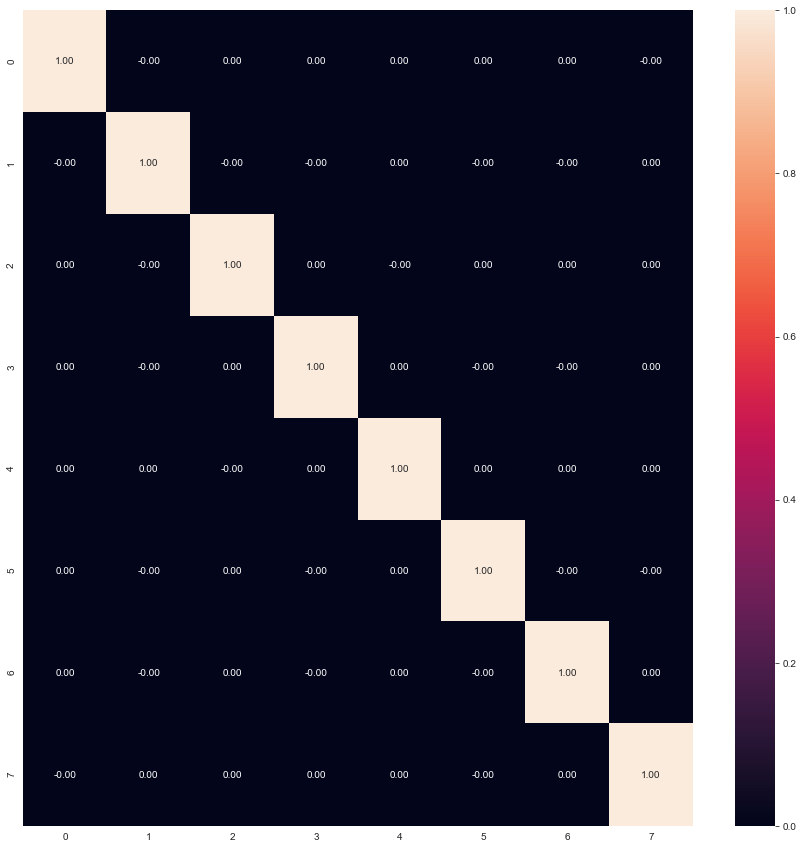

In [58]:
plot_correlation(pca_X)

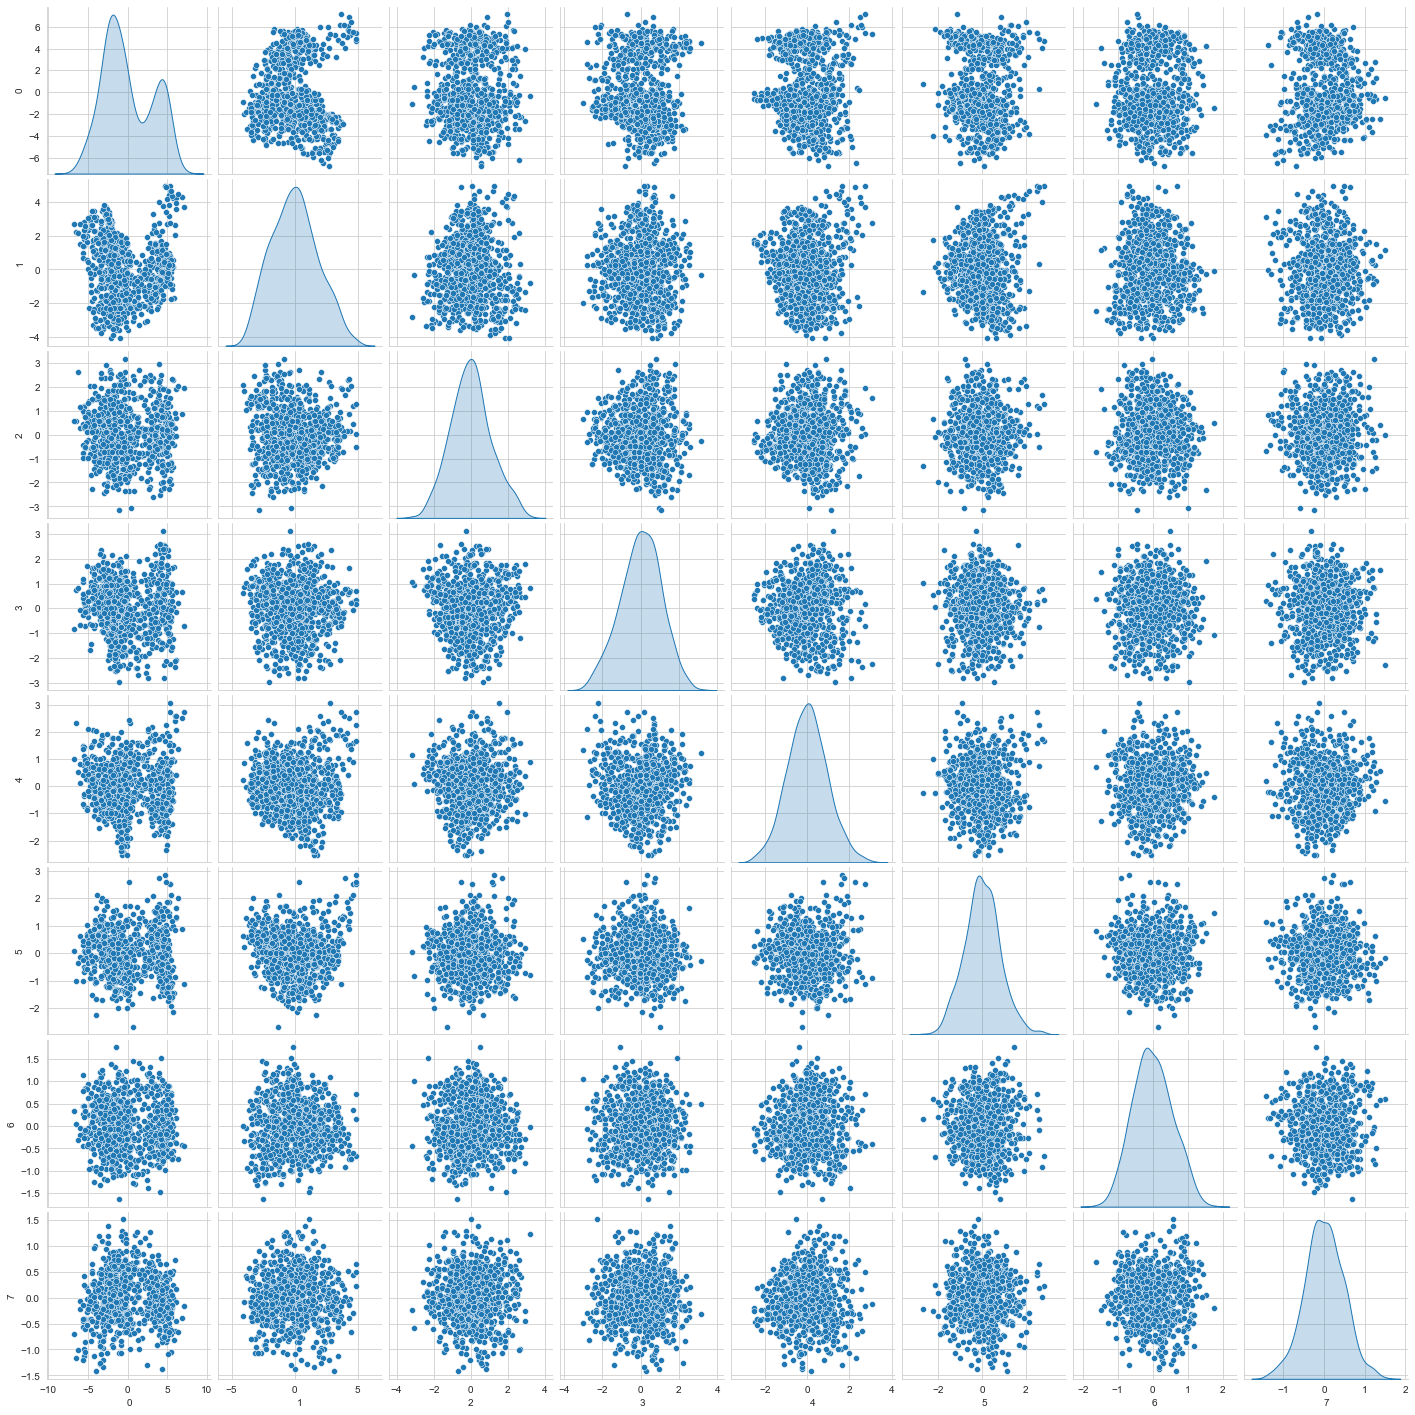

In [59]:
sns.pairplot(pca_X, diag_kind='kde')

**Observations**
- From the above correlation heatmap and pairplot grid, we can now observe that the columns have no collinearity after we have used Principal Component Analysis (PCA) to reduce dimensions

## 7. Repeat steps 3, 4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) (20 marks)

### 7.1. Split the data into train and test

In [60]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_X, y, test_size=0.3, random_state=10)

In [61]:
pca_X_train.shape

(592, 8)

In [62]:
pca_y_train.shape

(592,)

In [63]:
pca_X_test.shape

(254, 8)

In [64]:
pca_y_test.shape

(254,)

### 7.2. Train a Support Vector Machine (SVM) using the train set and get the accuracy on the test set

MODEL: SVM with PCA

Train Accuracy Score: 96.11
Test Accuracy Score: 94.49
---------------------
Classification Report
---------------------
              precision    recall  f1-score   support

         bus       0.97      0.94      0.96        71
         car       0.94      0.96      0.95       125
         van       0.93      0.91      0.92        58

    accuracy                           0.94       254
   macro avg       0.95      0.94      0.94       254
weighted avg       0.95      0.94      0.94       254

----------------
Confusion Matrix
----------------
[[ 67   4   0]
 [  1 120   4]
 [  1   4  53]]


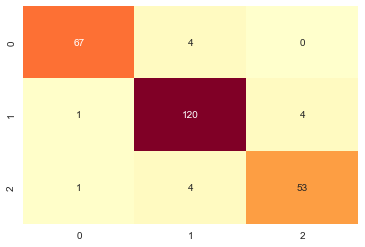

In [65]:
model = init_svc_classifier()
model_dict_svm_pca = train_and_predict('SVM with PCA', model, pca_X_train, pca_y_train, pca_X_test, pca_y_test)
score_dict_svm_pca = get_metrics('SVM with PCA', pca_y_test, model_dict_svm_pca['y_pred'])

In [66]:
model_dict_svm_pca

{'y_pred': array(['car', 'car', 'car', 'car', 'bus', 'car', 'car', 'car', 'car',
        'bus', 'car', 'van', 'car', 'car', 'van', 'car', 'bus', 'bus',
        'car', 'car', 'van', 'car', 'van', 'bus', 'bus', 'car', 'van',
        'bus', 'bus', 'van', 'car', 'van', 'bus', 'car', 'van', 'car',
        'van', 'car', 'bus', 'van', 'bus', 'car', 'car', 'bus', 'car',
        'car', 'car', 'car', 'bus', 'car', 'car', 'bus', 'car', 'van',
        'car', 'van', 'car', 'van', 'car', 'bus', 'bus', 'van', 'car',
        'bus', 'bus', 'car', 'van', 'car', 'car', 'bus', 'bus', 'car',
        'bus', 'car', 'bus', 'bus', 'bus', 'bus', 'bus', 'car', 'van',
        'van', 'bus', 'car', 'car', 'car', 'van', 'car', 'van', 'bus',
        'bus', 'car', 'car', 'car', 'van', 'car', 'van', 'van', 'car',
        'car', 'car', 'car', 'car', 'van', 'van', 'car', 'van', 'bus',
        'bus', 'van', 'car', 'van', 'bus', 'car', 'car', 'van', 'car',
        'bus', 'van', 'car', 'bus', 'car', 'bus', 'car', 'car', 'ca

In [67]:
score_dict_svm_pca

{'accuracy': 94.49, 'f1': 94.49, 'precision': 94.49, 'recall': 94.49}

### 7.3. Perform K-fold cross validation and get the cross validation score of the model (optional)

In [68]:
model = init_svc_classifier()
cv_score_svm_pca = cross_validate(model, pca_X, y)

-------------------------------
Cross Validation Accuracy Score
-------------------------------
1. Mean: 94.33
2. Std. Dev.: 1.96
3. Min: 91.75999999999999
4. Max: 97.61999999999999


In [69]:
cv_score_svm_pca

{'mean': 94.33,
 'std': 1.96,
 'min': 91.75999999999999,
 'max': 97.61999999999999}

## 8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings (5 points)

In [70]:
accuracy_data = [
    [
        'SVM - All', model_dict_svm['model_score_train'], model_dict_svm['model_score_test'], 
         score_dict_svm['accuracy'], score_dict_svm['f1'], score_dict_svm['precision'], score_dict_svm['recall']
    ],
    [
        'SVM - PCA', model_dict_svm_pca['model_score_train'], model_dict_svm_pca['model_score_test'], 
         score_dict_svm_pca['accuracy'], score_dict_svm_pca['f1'], score_dict_svm_pca['precision'], score_dict_svm_pca['recall']
    ]
]

accuracy_score_df = pd.DataFrame(
    accuracy_data, columns = ['Model', 'Train Score', 'Test Score', 'Accuracy', 'F1', 'Precision', 'Recall']
)

In [71]:
cv_data = [
    [ 'SVM - All', cv_score_svm['mean'], cv_score_svm['std'], cv_score_svm['min'], cv_score_svm['max'] ],
    [ 'SVM - PCA', cv_score_svm_pca['mean'], cv_score_svm_pca['std'], cv_score_svm_pca['min'], cv_score_svm_pca['max'] ]
]
cv_score_df = pd.DataFrame(
    cv_data, columns = ['Model', 'Mean', 'Std. Dev.', 'Min', 'Max']
)

### Accuracy Score Result

In [72]:
accuracy_score_df

Model  Train Score  Test Score  Accuracy     F1  Precision  Recall
0  SVM - All        96.79       96.06     96.06  96.06      96.06   96.06
1  SVM - PCA        96.11       94.49     94.49  94.49      94.49   94.49

### Cross Validation Score Result

In [73]:
cv_score_df

Model   Mean  Std. Dev.    Min    Max
0  SVM - All  95.87       1.92  92.94  98.81
1  SVM - PCA  94.33       1.96  91.76  97.62

**Observations & Conclusion**
- Above results clearly show that, by using PCA we are able to reduce the dimensions from 18 features to 8 features. However there is a slight dip in both accuracy and cross validation score results. 